<a href="https://colab.research.google.com/github/Jaggishah/Tensorflow_2.0/blob/main/tensorflow_first_practice_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
x = insurance_one_hot.drop("charges", axis= 1)
y = insurance_one_hot["charges"]

In [ ]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#create training dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 42)

In [ ]:
len(x), len(X_train)

(1338, 1070)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8589.1631 - mae: 8589.1631
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7880.0493 - mae: 7880.0493
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7556.2114 - mae: 7556.2114
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7786.4312 - mae: 7786.4312
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7671.3345 - mae: 7671.3345
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7564.9404 - mae: 7564.9404
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7593.8066 - mae: 7593.8066
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7692.3315 - mae: 7692.3315
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7580.3555 - mae: 7580.3555
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7761.7773 - mae: 7761.7773

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8497.2832 - mae: 8497.2832


[8497.283203125, 8497.283203125]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['mae'])

history = model_2.fit(X_train, y_train, epochs=200)


Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13314.4316 - mae: 13314.4316
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13168.3359 - mae: 13168.3359
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12869.5439 - mae: 12869.5439
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12274.7559 - mae: 12274.7559
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11236.4082 - mae: 11236.4082
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9795.8369 - mae: 9795.8369
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8364.4307 - mae: 8364.4307
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7569.2695 - mae: 7569.2695
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7411.8496 - mae: 7411.8496
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7388.8433 - mae:

In [ ]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3494.6321 - mae: 3494.6318


[3494.632080078125, 3494.6318359375]

Text(0.5, 0, 'epochs')

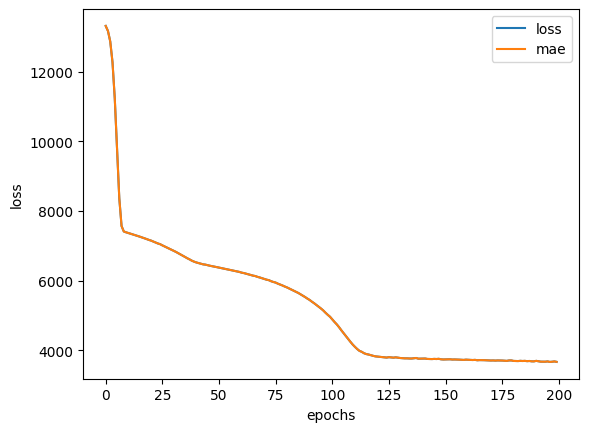

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
another_dataframe = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
another_dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

X= another_dataframe.drop("charges", axis =1)
Y= another_dataframe["charges"]

X_train, X_test, y_trian, y_test = train_test_split(X ,Y , test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape , X_train_normal.shape

((1070, 6), (1070, 11))